---
Title: "Data Analytics: Business Decision Research"

Author: "Joseph Armando Carvallo"

Date: "24/03/2021"

---

I want to do a churn analysis of products in one of the branches. My goal is to provide recommendations and strategies to reduce customer churn.

**Market Research and Recommendation and Visualization Technique for Business Decision Making**

DQLab Sport Center is a store that sells various sports needs such as jackets, clothes, bags, and shoes. The shop has been selling since 2013, so it has had regular customers for a long time, and is still trying to get new customers to this day.

In early 2019, the store manager hired a junior Data Analyst to help solve the problem in his store, namely the decline in customers who buy back to his store. The Junior Data Analyst was also entrusted with processing the store's transaction data. The store manager defines that a customer is no longer called a customer (churn) when he has not transacted to his store again up to the last 6 months from the last available data update.

The store manager also provided transaction data from 2013 to 2019 in the form of csv (comma separated value) with `data_retail.csv` with 100,000 rows of data.

The fields in the data include:
1. no
2. Row_Num
3. Customer_ID
4. Product
5. First_Transaction
6. Last_Transaction
7. Average_Trasaction_Amount
8. Count_Transaction

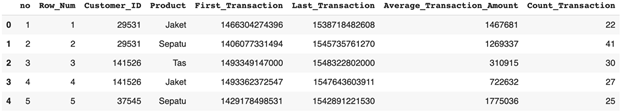

So, the store manager and junior Data Analyst at one of the branches asked me to help out with their market research with the data and issues. It's good that while I'm working, I make my work report step by step so that the data analysis process can be known to solve this case.

# Data Preparation

**Importing data and inspecction**

i import the dataset from https://storage.googleapis.com/dqlab-dataset/data_retail.csv and then inspect the dataset by printing only the first five data and printing the dataset info.

In [ ]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

print('First Five Data')
df.head()

First Five Data


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [ ]:
print('Info dataset')
df.info()

Info dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


**Data cleaning**

The two columns that indicate the occurrence of the transaction are not of datetime type, so I will change the two columns to the datetime data type. Then I will reprint first five data from the `df` dataframe and also the data type of each column.

In [ ]:
# Column First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Column Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('First Five Data')
df.head()

First Five Data


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25


In [ ]:
print('\nInfo dataset:')
df.info()


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


**Churn Customers**

To determine churn customers according to the definition given, I look for the most recent transaction when it was done
classify which customers are churn statuses and which are not. After that I print first five data and dataset information.

In [ ]:
# Check last transaction in dataset
print(max(df['Last_Transaction']))

# Classify customer churn or not with boolean values
df.loc[df['Last_Transaction'] <= '2018-08-01','is_churn'] = "Yes"
df.loc[df['Last_Transaction'] > '2018-08-01','is_churn'] = "No" 

print('First Five Data')
df.head()

2019-02-01 23:57:57.286000013
First Five Data


,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,No
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,No
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,No
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,No
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,No


In [ ]:
print('Info dataset')
df.info()

Info dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB


**Delete unnecessary columns**

I will delete the unnecessary columns and reprint first five data.

In [ ]:
# Delete unnecessary columns
del df['no']
del df['Row_Num']

# Print First Five Data
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,No
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,No
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,No
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,No
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,No


# Data Visualization

**Customer acquisition by year**

After everything went smoothly, the next step is to create a data visualization of trend of customer acquisition by year using a bar chart. For that I will create additional features or columns which are the year of `First_Transaction` and the year of `Last_Transaction` respectively with the names `Year_First_Transaction` and `Year_Last_Transaction` before visualizing.

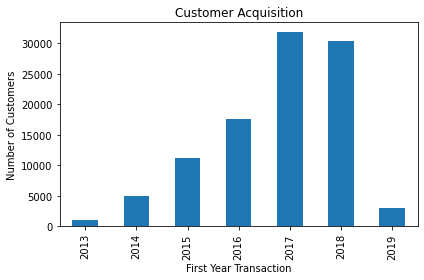

In [ ]:
import matplotlib.pyplot as plt

# Column first year transaction
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Column last year transaction
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Customer Acquisition')
plt.xlabel('First Year Transaction')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**Transactions by year**

I visualize the trend of the number of transactions per year using a bar chart.

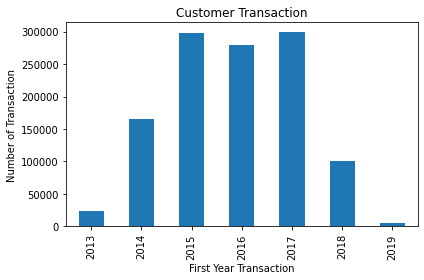

In [ ]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Customer Transaction')
plt.xlabel('First Year Transaction')
plt.ylabel('Number of Transaction')
plt.tight_layout()
plt.show()

**Average transaction amount by year**

Using the seaborn pointplot, I visualize the trend from year to year in the average number of transactions for each product.

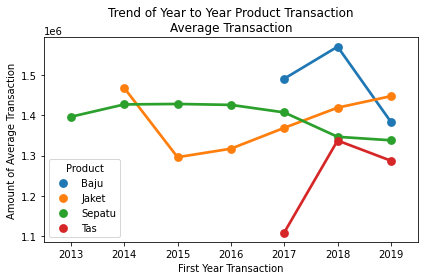

In [ ]:
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(
    ['Product', 'Year_First_Transaction']).mean().reset_index(), 
    x = 'Year_First_Transaction',
    y = 'Average_Transaction_Amount', 
    hue = 'Product'
    )
plt.title('Trend of Year to Year Product Transaction\nAverage Transaction')
plt.xlabel('First Year Transaction')
plt.ylabel('Amount of Average Transaction')
plt.tight_layout()
plt.show()

**Proportion of churned customers for each product**

In terms of churned customers, especially to see how big the proportion of churned customers for each product is, the insight can be known through a pie chart. I visualize the pie charts for the four products.

<Figure size 432x288 with 0 Axes>

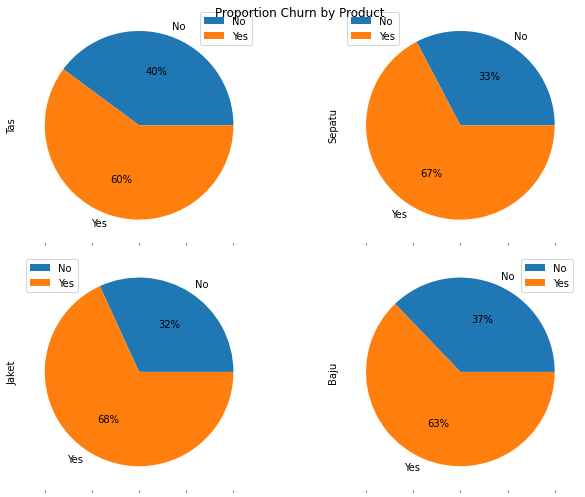

In [ ]:
plt.clf()
# Pivot data
df_piv = df.pivot_table(
    index = 'is_churn', 
    columns = 'Product',
    values = 'Customer_ID', 
    aggfunc = 'count', 
    fill_value = 0
    )

# Get proportion churn by products
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plot the pie chart
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(
    subplots = True,
    figsize = (10, 7),
    layout = (-1, 2),
    autopct = '%1.0f%%',
    title='Proportion Churn by Product'
    )
plt.tight_layout()
plt.show()

**Distribution categorization of count transactions**

Next, I will visualize the distribution of the categorization of count transactions. The categorization is done by grouping the number of transactions as shown in the following table:

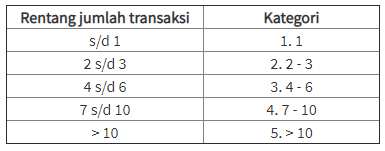

After adding a new column for the category with the name `Count_Transaction_Group`, then I visualize it with a bar chart.

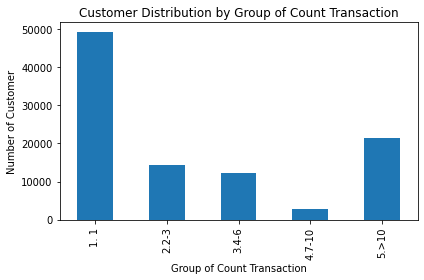

In [ ]:
plt.clf()

# Categorize number of transaction
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
        val ='2.2-3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
        val ='3.4-6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
        val ='4.7-10'
    else:
        val ='5.>10'
    return val

# Add new column
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Group of Count Transaction')
plt.xlabel('Group of Count Transaction')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

**Distribution of categorization of average transaction amount**

Next, I visualize the distribution of the average transaction amount categorization. The categorization is done by grouping the average transaction size as shown in the following table:

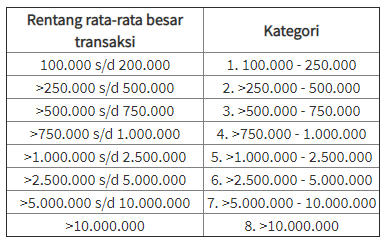

After adding a new column for the category with the name `Average_Transaction_Amount_Group`, then I visualize it with a bar chart.

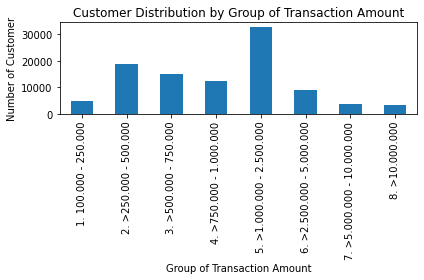

In [ ]:
plt.clf()

# Categorize average transaction
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val

# Add new column
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Group of Transaction Amount')
plt.xlabel('Group of Transaction Amount')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

# Modelling

**Feature Columns and Target**

In this section, I will define the feature columns of the existing dataset, here I will select the columns `Average_Transaction_Amount`, `Count_Transaction`, and `Year_Diff`. However, the last column does not exist yet. First, I will create the `Year_Diff` column and then assign the dataset with the feature columns as independent variable X. For the target, of course, a customer problem with churn conditions or not, assign the dataset for the target to the dependent variable y.

In [ ]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# Names of feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Feature variable
X = df[feature_columns]

# Target variable
y = df['is_churn']

**Split X and y into training and testing sections**

After the independent variable X and the dependent variable y were created, then I will split X and y into the training and testing sections. The testing portion is 25% of the total data entry.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Train, predict, and evaluate**

The next step I will create a model using Logistic Regression, initialize the model, fit it, and then evaluate the model using the confusion matrix.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Initialize logreg model
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluate model using confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


**Visualization of confusion matrix**

The previously calculated confusion matrix can be visualized using a heatmap from seaborn. For that I show a visualization of this confusion matrix.

<Figure size 432x288 with 0 Axes>

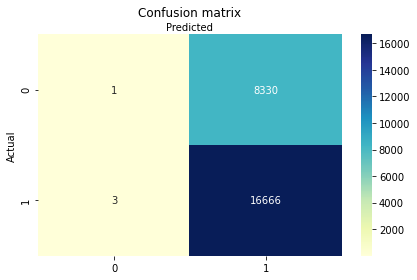

In [ ]:
import numpy as np

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

**Accuracy, precision, and recall**

Then, I calculate the accuracy, precision and recall values based on the actual target value, and the predicted target value.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, dan recall
print('Accuracy\t:', accuracy_score(y_test, y_pred))
print('Precision\t:', precision_score(y_test, y_pred, average='micro'))
print('Recall\t:', recall_score(y_test, y_pred, average='micro'))

Accuracy	: 0.66668
Precision	: 0.66668
Recall	: 0.66668
